In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
sales_df = pd.read_csv('sales 111.csv', low_memory=False)
product_hierarchy_df = pd.read_csv('product_hierarchy.csv')
store_cities_df = pd.read_csv('store_cities.csv')

In [5]:
sales_df = sales_df[0:10000000]

In [6]:
# Display the first few rows of each dataset
print("Sales DataFrame:")
print(sales_df.head())
print("\nSales DataFrame Info:")
sales_df.info()
print("\nSales DataFrame Summary Statistics:")
print(sales_df.describe())

Sales DataFrame:
  product_id store_id        date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2 promo_bin_2  promo_discount_2 promo_discount_type_2  
0         NaN         PR03         NaN               NaN                   NaN  
1         NaN         PR03         NaN               NaN                   NaN  
2         NaN         PR03         NaN               NaN                   NaN  
3         NaN         PR03         NaN               NaN                   NaN  
4         NaN         PR03         NaN               NaN                   NaN  

Sales DataFrame

In [10]:
print(sales_df.shape)

(10000000, 13)


In [12]:
# Finding missing values
print("\nMissing Values in Sales DataFrame:")
print(sales_df.isnull().sum())



Missing Values in Sales DataFrame:
product_id                      0
store_id                        0
date                            0
sales                           0
revenue                         0
stock                           0
price                      516395
promo_type_1                    0
promo_bin_1               8825265
promo_type_2                    0
promo_bin_2              10000000
promo_discount_2         10000000
promo_discount_type_2    10000000
dtype: int64


In [14]:
sales = sales_df.drop(['promo_bin_1',
                    'promo_bin_2',
                    'promo_discount_2',
                    'promo_discount_type_2',
                    'promo_type_1',
                    'promo_type_2'], 
                    axis=1)

In [16]:
print(sales.head())

  product_id store_id        date  sales  revenue  stock  price
0      P0001    S0002  2017-01-02    0.0     0.00    8.0   6.25
1      P0001    S0012  2017-01-02    1.0     5.30    0.0   6.25
2      P0001    S0013  2017-01-02    2.0    10.59    0.0   6.25
3      P0001    S0023  2017-01-02    0.0     0.00    6.0   6.25
4      P0001    S0025  2017-01-02    0.0     0.00    1.0   6.25


In [18]:
sales_df_filled = sales.fillna(sales.median(numeric_only=True))
print(sales_df_filled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   product_id  object 
 1   store_id    object 
 2   date        object 
 3   sales       float64
 4   revenue     float64
 5   stock       float64
 6   price       float64
dtypes: float64(4), object(3)
memory usage: 534.1+ MB
None


In [20]:
print(sales_df_filled.isnull().sum())

product_id    0
store_id      0
date          0
sales         0
revenue       0
stock         0
price         0
dtype: int64


In [22]:
#Orignal Shape
print(f"Original shape: {sales_df.shape}")
print(f"Original shape: {product_hierarchy_df.shape}")
print(f"Original shape: {store_cities_df.shape}")

Original shape: (10000000, 13)
Original shape: (699, 10)
Original shape: (144, 4)


In [24]:
#Shape after filling missing values
print(f"shape after filling values: {sales_df_filled.shape}")

shape after filling values: (10000000, 7)


In [26]:
# Remove duplicates from the sales DataFrame
sales_df_clean = sales_df_filled.drop_duplicates()

# Remove duplicates from the product_hierarchy DataFrame
product_hierarchy_df_clean = product_hierarchy_df.drop_duplicates()

# Remove duplicates from the store_cities DataFrame
store_cities_df_clean = store_cities_df.drop_duplicates()

print("Sales DataFrame:")
print(f"Shape after removing duplicates: {sales_df_clean.shape}")

print("\nProduct Hierarchy DataFrame:")
print(f"Shape after removing duplicates: {product_hierarchy_df_clean.shape}")

print("\nStore Cities DataFrame:")
print(f"Shape after removing duplicates: {store_cities_df_clean.shape}")

Sales DataFrame:
Shape after removing duplicates: (10000000, 7)

Product Hierarchy DataFrame:
Shape after removing duplicates: (699, 10)

Store Cities DataFrame:
Shape after removing duplicates: (144, 4)


In [28]:
# Convert 'date' column to datetime
sales_df_clean['date'] = pd.to_datetime(sales_df_clean['date'])

# Check the resulting DataFrame
print(sales_df_clean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 7 columns):
 #   Column      Dtype         
---  ------      -----         
 0   product_id  object        
 1   store_id    object        
 2   date        datetime64[ns]
 3   sales       float64       
 4   revenue     float64       
 5   stock       float64       
 6   price       float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 534.1+ MB
None


In [30]:
print(sales_df_clean.columns)

Index(['product_id', 'store_id', 'date', 'sales', 'revenue', 'stock', 'price'], dtype='object')


In [32]:
print(sales_df_clean['store_id'].nunique())
print(sales_df_clean['product_id'].nunique())
print(sales_df_clean['sales'].describe())

141
469
count    1.000000e+07
mean     4.819766e-01
std      1.971772e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.330100e+04
Name: sales, dtype: float64


In [34]:
# Function to convert alphanumeric IDs to numeric
def to_numeric_id(id_string):
    return int(id_string[1:])  # Remove the first character and convert to integer

# Apply the conversion to product_id and store_id
sales_df_clean['product_id_numeric'] = sales_df_clean['product_id'].apply(to_numeric_id)
sales_df_clean['store_id_numeric'] = sales_df_clean['store_id'].apply(to_numeric_id)

# Display the first few rows to verify the conversion
print(sales_df_clean[['product_id', 'product_id_numeric', 'store_id', 'store_id_numeric']].head())

  product_id  product_id_numeric store_id  store_id_numeric
0      P0001                   1    S0002                 2
1      P0001                   1    S0012                12
2      P0001                   1    S0013                13
3      P0001                   1    S0023                23
4      P0001                   1    S0025                25


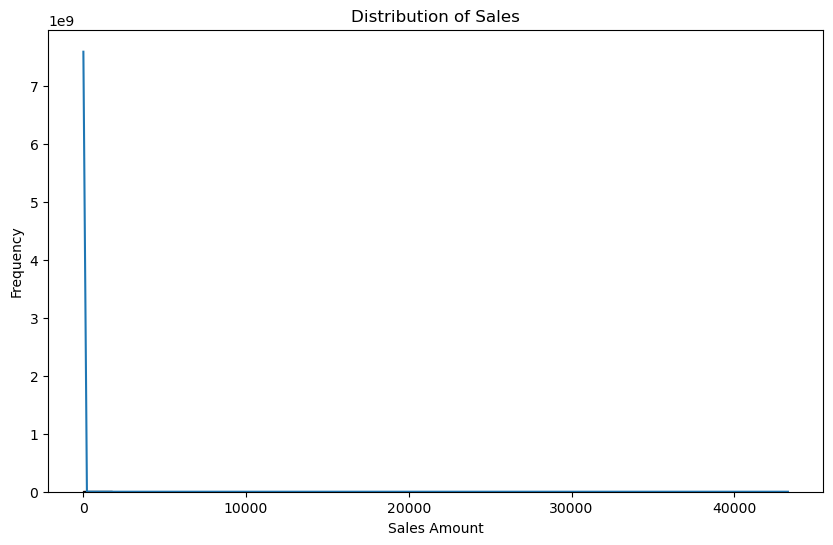

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_df_clean['sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

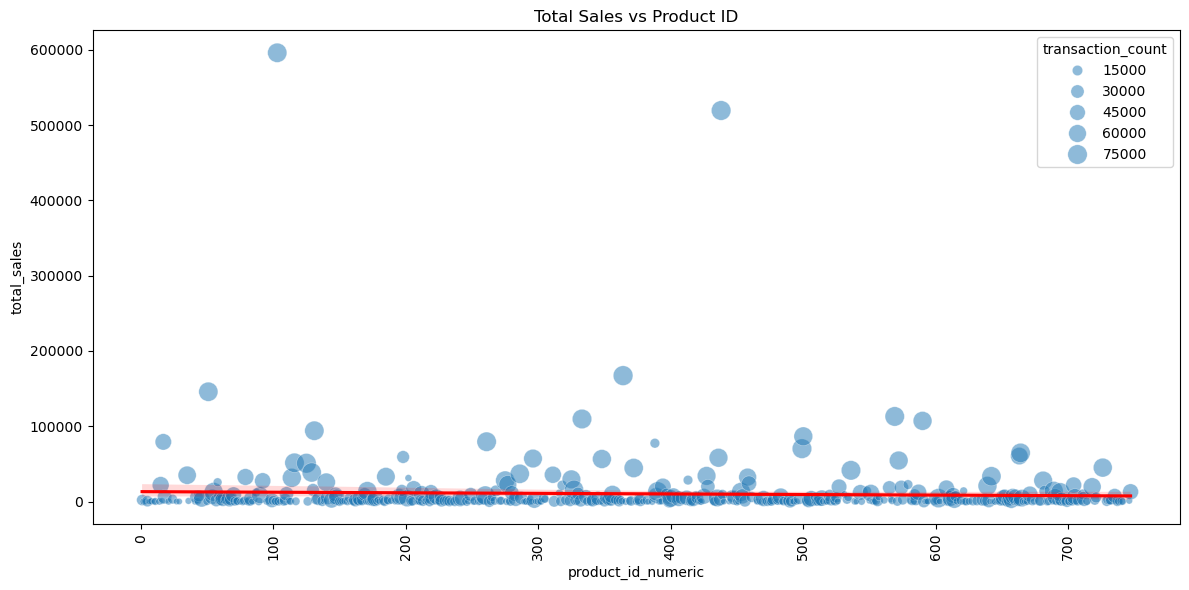

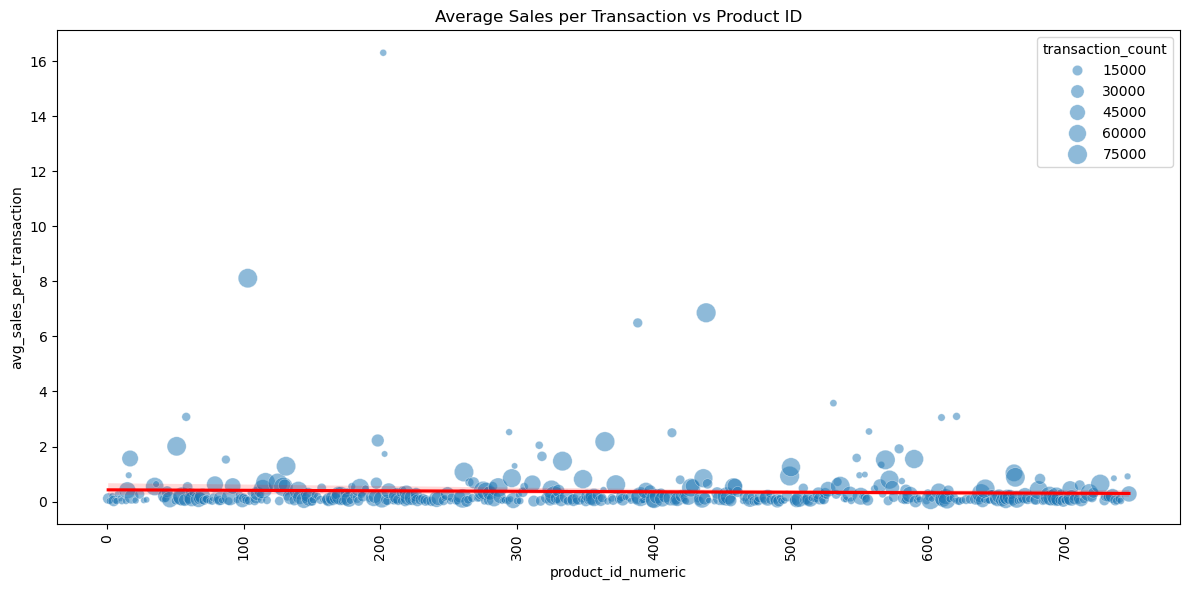

In [37]:

# Calculate total sales and average sales per transaction for each product
product_stats = sales_df_clean.groupby('product_id_numeric').agg({
    'sales': ['sum', 'mean'],
    'product_id_numeric': 'count'
}).reset_index()
product_stats.columns = ['product_id_numeric', 'total_sales', 'avg_sales_per_transaction', 'transaction_count']

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_stats, x='product_id_numeric', y='total_sales', 
                size='transaction_count', sizes=(20, 200), alpha=0.5)

plt.title('Total Sales vs Product ID')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)

# Add a trend line
sns.regplot(data=product_stats, x='product_id_numeric', y='total_sales', 
            scatter=False, color='red')

plt.tight_layout()
plt.show()

# Create another scatter plot for average sales per transaction
plt.figure(figsize=(12, 6))
sns.scatterplot(data=product_stats, x='product_id_numeric', y='avg_sales_per_transaction', 
                size='transaction_count', sizes=(20, 200), alpha=0.5)

plt.title('Average Sales per Transaction vs Product ID')
plt.xlabel('Product ID')
plt.ylabel('Average Sales per Transaction')
plt.xticks(rotation=90)

# Add a trend line
sns.regplot(data=product_stats, x='product_id_numeric', y='avg_sales_per_transaction', 
            scatter=False, color='red')

plt.tight_layout()
plt.show()

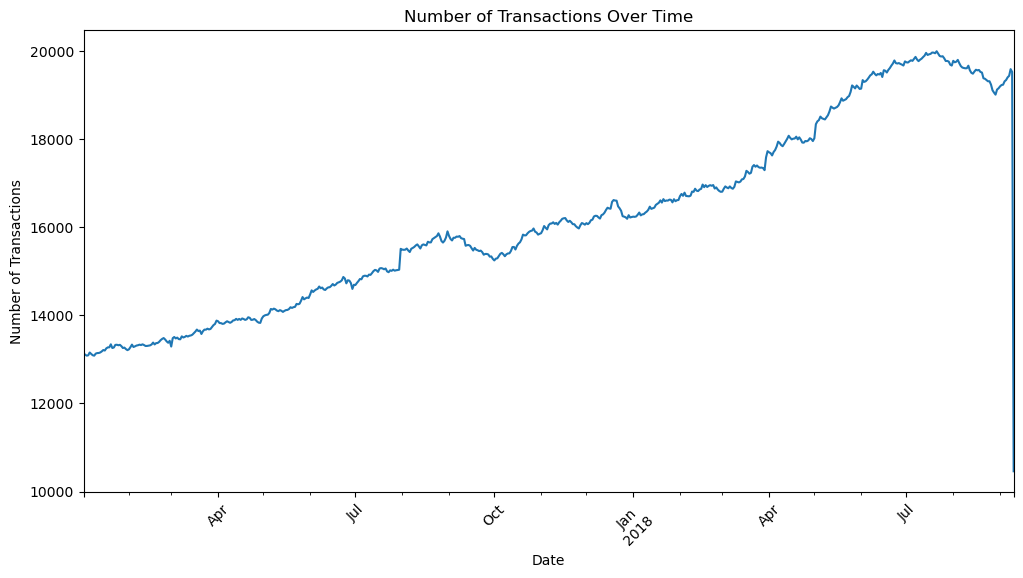

In [38]:
plt.figure(figsize=(12, 6))
sales_df_clean['date'].value_counts().sort_index().plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

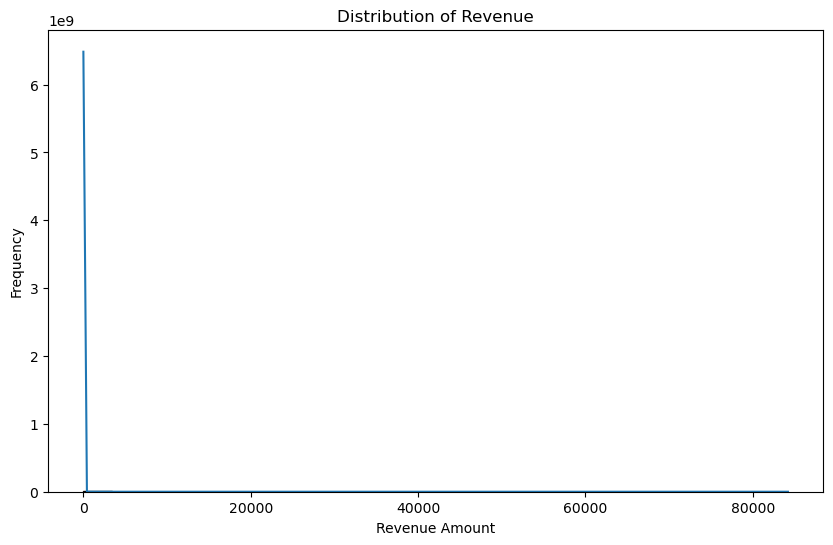

In [39]:
# Plot the distribution of revenue
plt.figure(figsize=(10, 6))
sns.histplot(sales_df_clean['revenue'], kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue Amount')
plt.ylabel('Frequency')
plt.show()

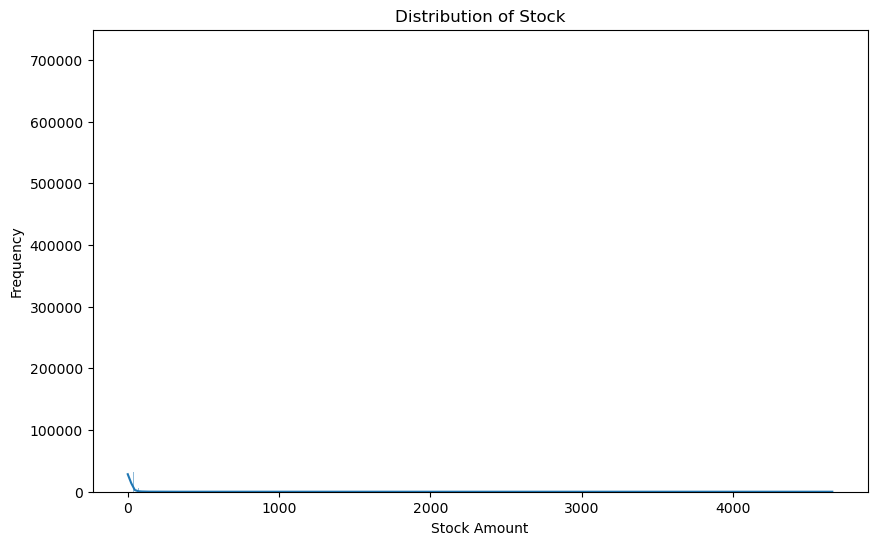

In [40]:
# 3. Analyze stock
plt.figure(figsize=(10, 6))
sns.histplot(sales_df_clean['stock'], kde=True)
plt.title('Distribution of Stock')
plt.xlabel('Stock Amount')
plt.ylabel('Frequency')
plt.show()

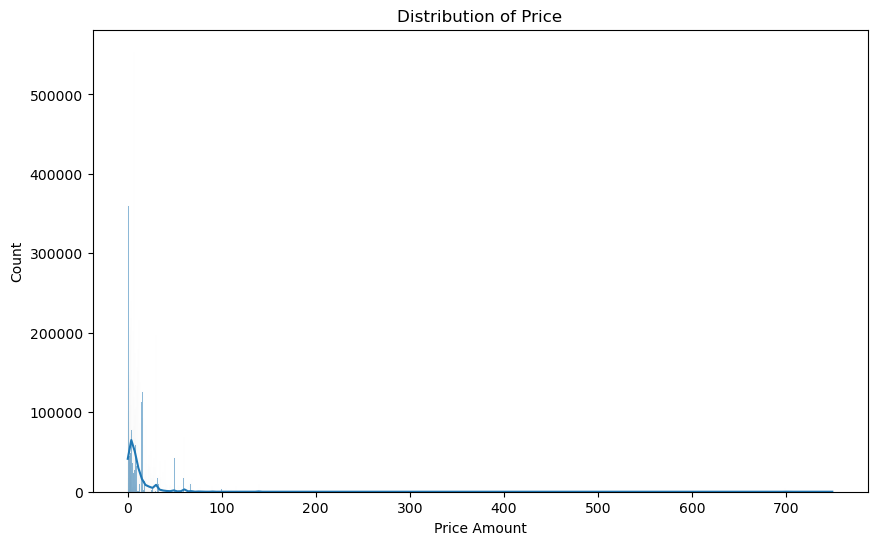

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_df_clean['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price Amount')
plt.ylabel('Count')
plt.show()

In [45]:

def plot_histogram(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

def plot_boxplot(df, column, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(title)
    plt.xlabel(column)
    plt.show()

def plot_countplot(df, column, title,top_n=20):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    top_products = df[column].value_counts().nlargest(top_n)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

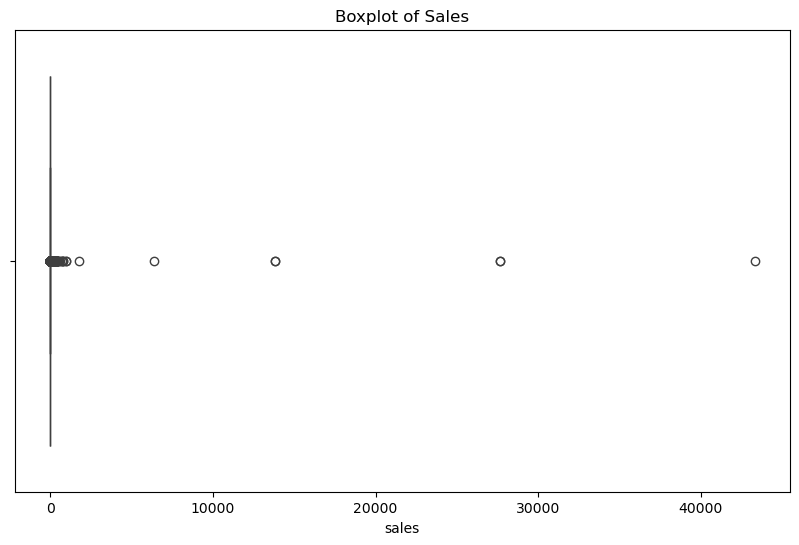

count    1.000000e+07
mean     4.819766e-01
std      1.971772e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.330100e+04
Name: sales, dtype: float64


In [46]:
# 1. Analyze sales amounts
plot_boxplot(sales_df_clean, 'sales', 'Boxplot of Sales')
print(sales_df_clean['sales'].describe())

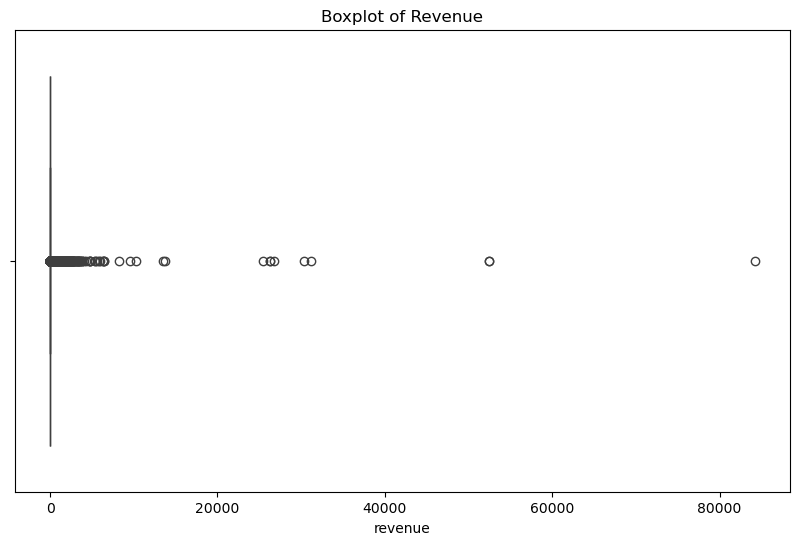


Summary statistics for revenue:
count    1.000000e+07
mean     1.829042e+00
std      4.453109e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.419796e+04
Name: revenue, dtype: float64


In [47]:
# 2. Analyze revenue
plot_boxplot(sales_df_clean, 'revenue', 'Boxplot of Revenue')
print("\nSummary statistics for revenue:")
print(sales_df_clean['revenue'].describe())

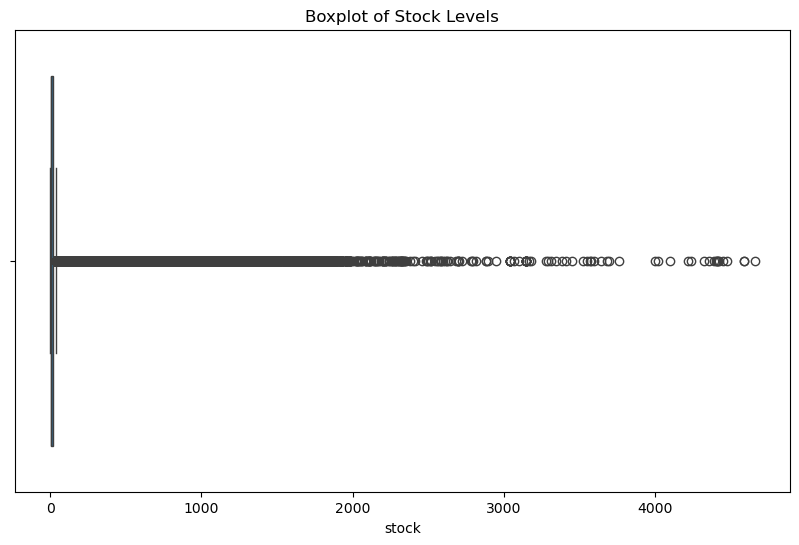


Summary statistics for stock:
count    1.000000e+07
mean     1.658408e+01
std      4.029255e+01
min      0.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      1.700000e+01
max      4.655000e+03
Name: stock, dtype: float64


In [48]:
# 3. Analyze stock
plot_boxplot(sales_df_clean, 'stock', 'Boxplot of Stock Levels')
print("\nSummary statistics for stock:")
print(sales_df_clean['stock'].describe())


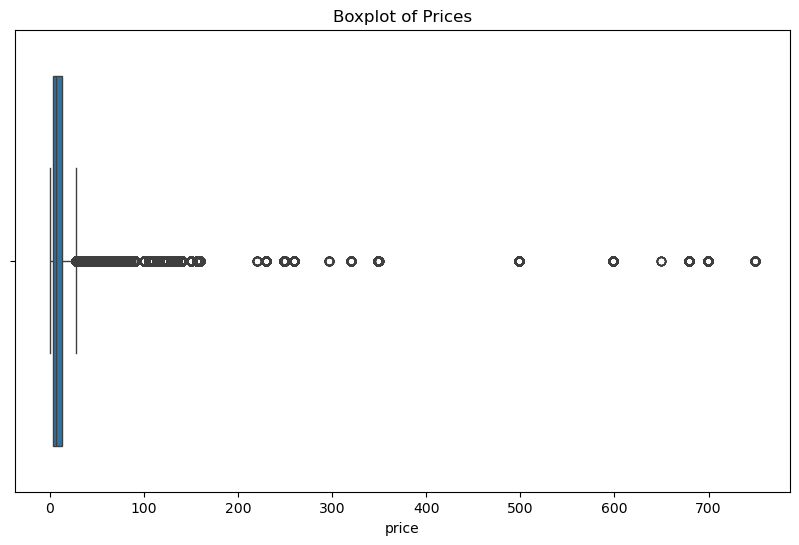


Summary statistics for price:
count    1.000000e+07
mean     1.136176e+01
std      2.242836e+01
min      2.500000e-01
25%      2.950000e+00
50%      6.750000e+00
75%      1.290000e+01
max      7.490000e+02
Name: price, dtype: float64


In [49]:
# 4. Analyze price
plot_boxplot(sales_df_clean, 'price', 'Boxplot of Prices')
print("\nSummary statistics for price:")
print(sales_df_clean['price'].describe())

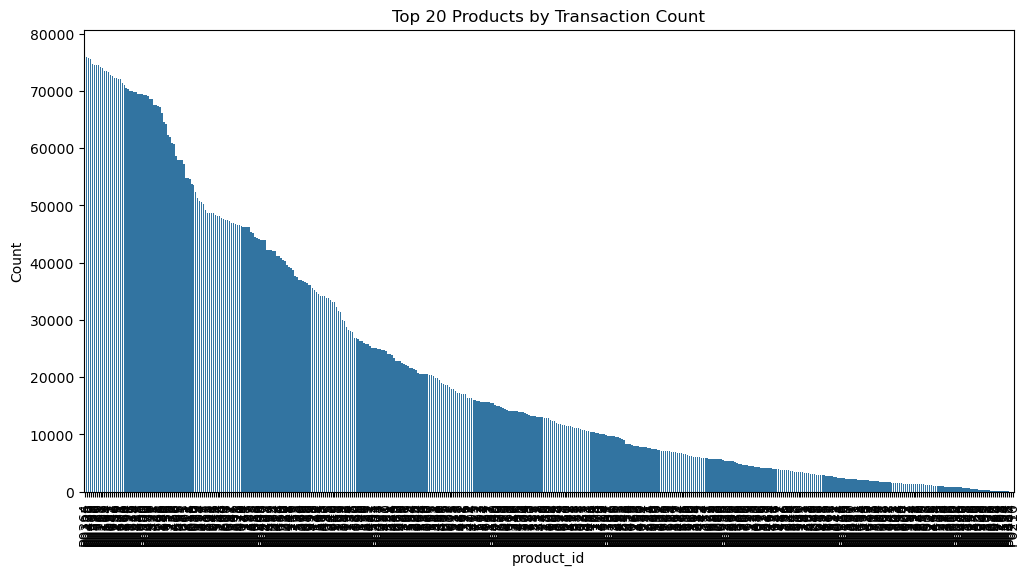


Top 5 products by transaction count:
product_id
P0364    76862
P0125    75845
P0438    75696
P0499    75600
P0333    74737
Name: count, dtype: int64


In [50]:
# 5. Analyze product_id
plot_countplot(sales_df_clean, 'product_id', 'Top 20 Products by Transaction Count')
print("\nTop 5 products by transaction count:")
print(sales_df_clean['product_id'].value_counts().head())


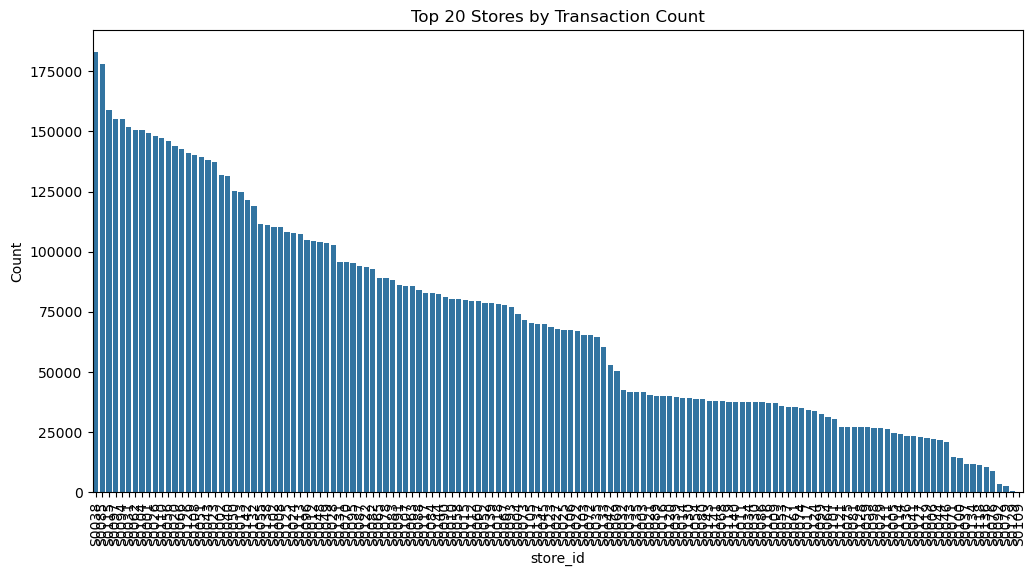


Top 5 stores by transaction count:
store_id
S0038    182875
S0085    178141
S0115    159093
S0097    155296
S0094    155068
Name: count, dtype: int64


In [51]:
# 6. Analyze store_id
plot_countplot(sales_df_clean, 'store_id', 'Top 20 Stores by Transaction Count')
print("\nTop 5 stores by transaction count:")
print(sales_df_clean['store_id'].value_counts().head())

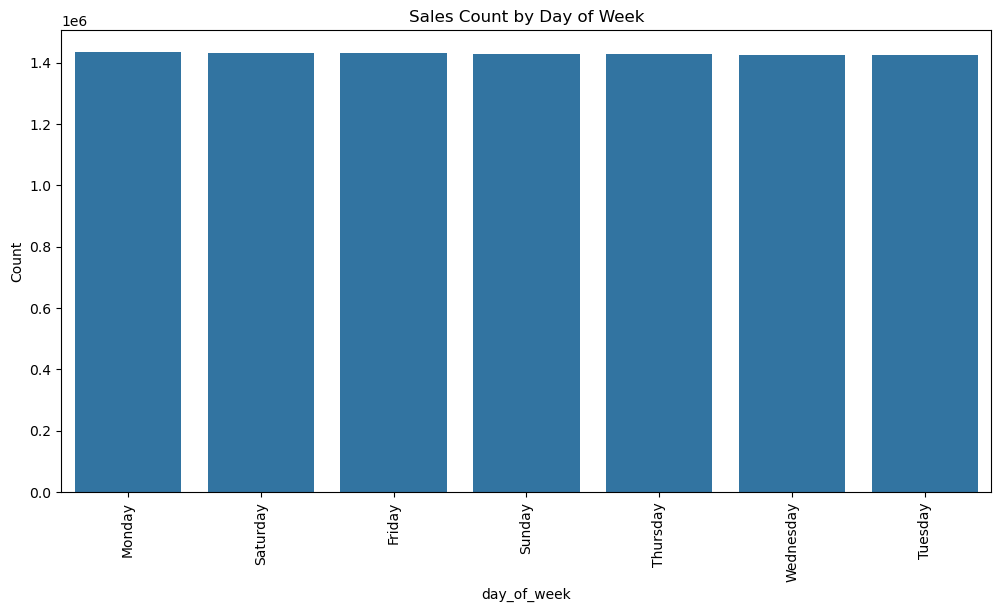

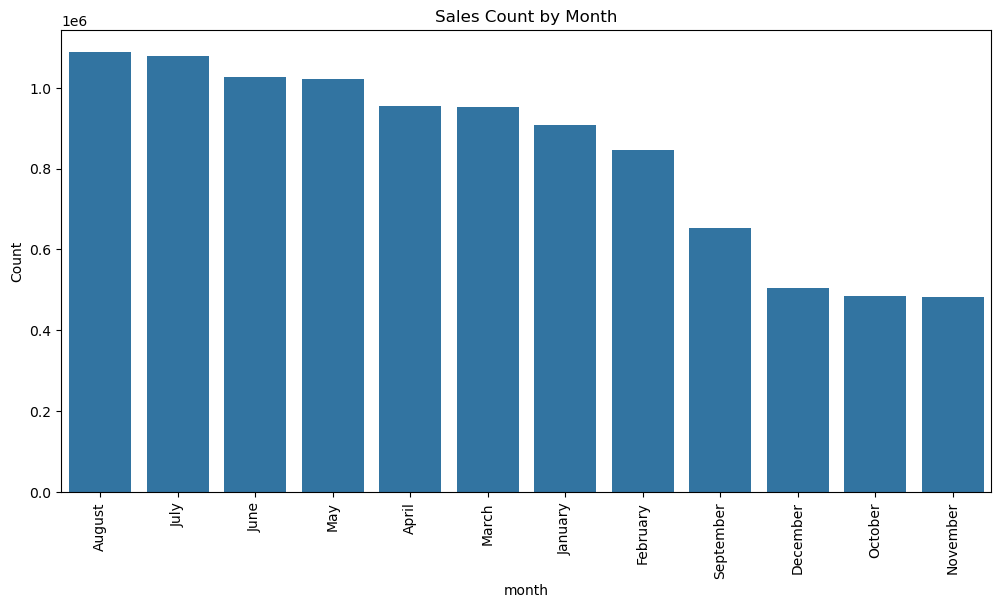

In [52]:
# 7. Analyze date-related information
sales_df_clean['date'] = pd.to_datetime(sales_df_clean['date'])
sales_df_clean['day_of_week'] = sales_df_clean['date'].dt.day_name()
sales_df_clean['month'] = sales_df_clean['date'].dt.month_name()

plot_countplot(sales_df_clean, 'day_of_week', 'Sales Count by Day of Week')
plot_countplot(sales_df_clean, 'month', 'Sales Count by Month')

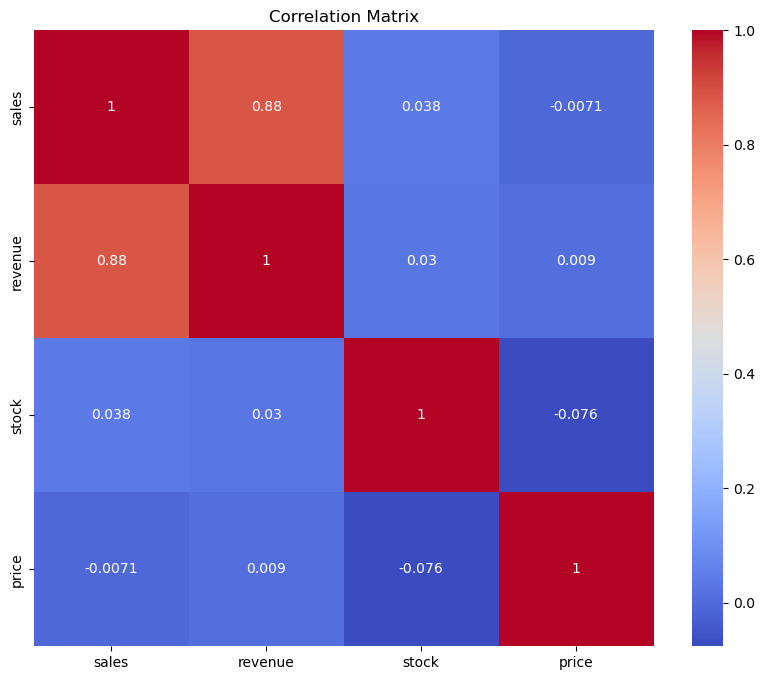

In [54]:
# 8. Correlation analysis
correlation_matrix = sales_df_clean[['sales', 'revenue', 'stock', 'price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [56]:

# Assuming your data is in a DataFrame called 'df'
product_analysis = sales_df_clean.groupby('product_id').agg({
    'sales': 'sum',
    'revenue': 'sum'
})

# Rename columns for clarity
product_analysis.columns = ['total_sales_volume', 'total_revenue']

# Calculate average price per product
product_analysis['avg_price'] = product_analysis['total_revenue'] / product_analysis['total_sales_volume']

# Sort by total revenue (descending) to see top-performing products
product_analysis = product_analysis.sort_values('total_revenue', ascending=False)

# Display the results
print(product_analysis)

            total_sales_volume  total_revenue  avg_price
product_id                                              
P0103                596111.00    1582754.213   2.655133
P0129                 38592.00     828721.330  21.473915
P0500                 86571.00     571224.230   6.598332
P0428                 19974.00     531877.950  26.628515
P0316                 11045.21     509003.010  46.083597
...                        ...            ...        ...
P0667                     1.00         19.070  19.070000
P0289                     3.00         10.170   3.390000
P0465                    19.00          8.050   0.423684
P0444                     0.00          0.000        NaN
P0210                     0.00          0.000        NaN

[469 rows x 3 columns]


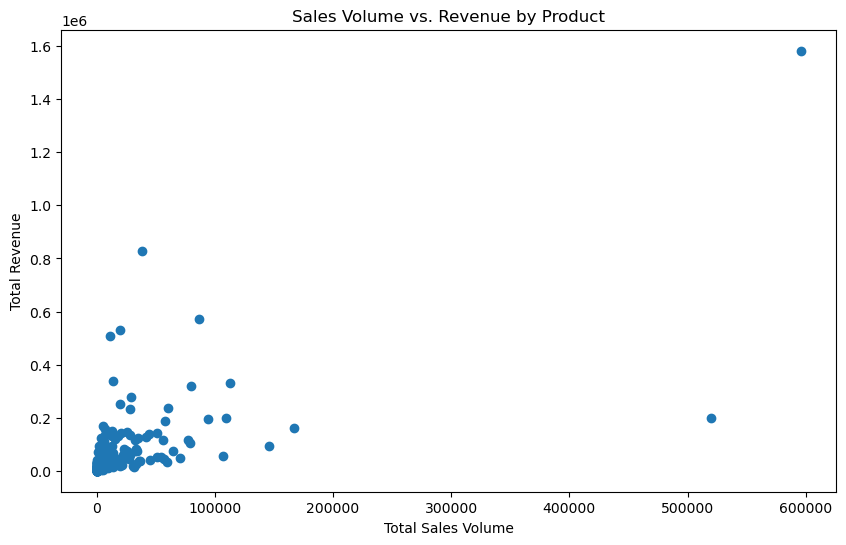

In [57]:
#total sales volume vs total revenue
plt.figure(figsize=(10, 6))
plt.scatter(product_analysis['total_sales_volume'], product_analysis['total_revenue'])
plt.title('Sales Volume vs. Revenue by Product')
plt.xlabel('Total Sales Volume')
plt.ylabel('Total Revenue')
plt.show()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'P0210'),
  Text(1, 0, 'P0444'),
  Text(2, 0, 'P0667'),
  Text(3, 0, 'P0289'),
  Text(4, 0, 'P0502')])

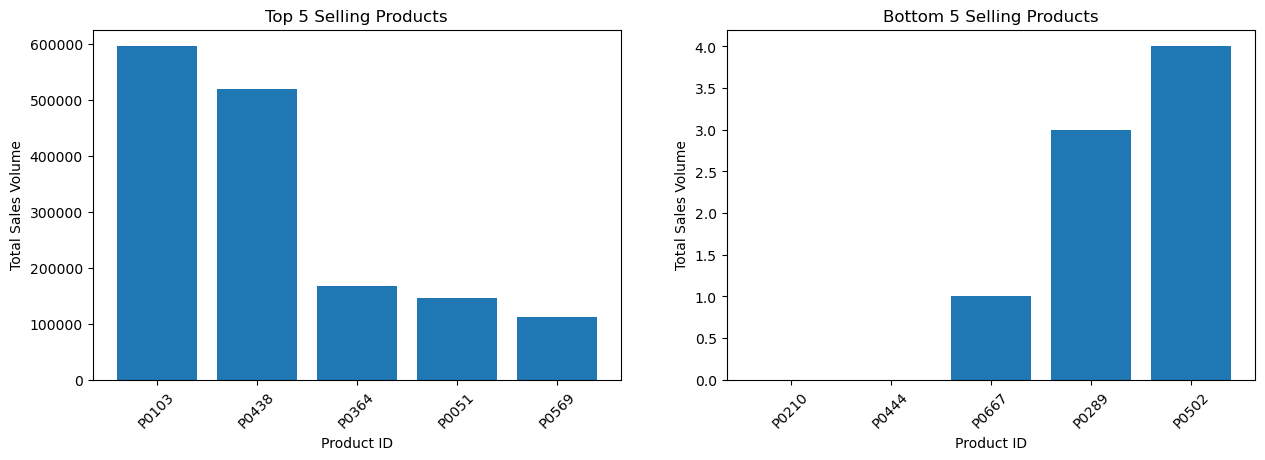

In [58]:

product_analysis = sales_df_clean.groupby('product_id').agg({
    'sales': 'sum',
    'revenue': 'sum'
}).rename(columns={'sales': 'total_sales_volume', 'revenue': 'total_revenue'})

product_analysis['avg_price'] = product_analysis['total_revenue'] / product_analysis['total_sales_volume']
product_analysis['sales_percentile'] = product_analysis['total_sales_volume'].rank(pct=True)
product_analysis['revenue_percentile'] = product_analysis['total_revenue'].rank(pct=True)

# Top and bottom performers
top_5_sales = product_analysis.nlargest(5, 'total_sales_volume')
bottom_5_sales = product_analysis.nsmallest(5, 'total_sales_volume')

# Visualizations
plt.figure(figsize=(15, 10))

# Top 5 selling products
plt.subplot(2, 2, 1)
plt.bar(top_5_sales.index, top_5_sales['total_sales_volume'])
plt.title('Top 5 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)

# Bottom 5 selling products
plt.subplot(2, 2, 2)
plt.bar(bottom_5_sales.index, bottom_5_sales['total_sales_volume'])
plt.title('Bottom 5 Selling Products')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)





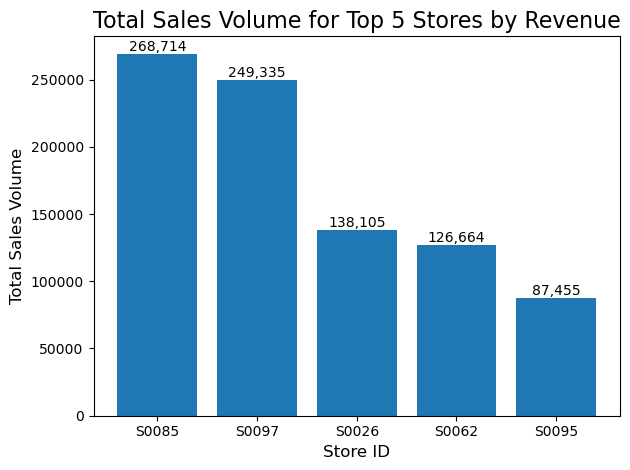

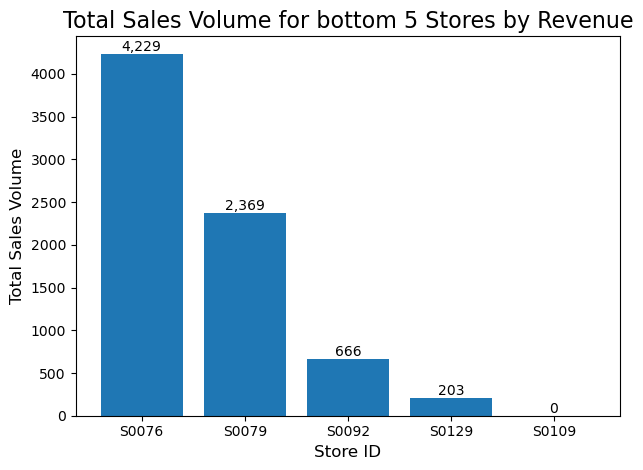

In [64]:

# Assuming your data is in a DataFrame called 'df'
store_analysis = sales_df_clean.groupby('store_id').agg({
    'sales': 'sum',
    'revenue': 'sum'
}).rename(columns={'sales': 'total_sales_volume', 'revenue': 'total_revenue'})

# Calculate average price per item sold in each store
store_analysis['avg_price'] = store_analysis['total_revenue'] / store_analysis['total_sales_volume']

# Sort stores by total revenue
store_analysis = store_analysis.sort_values('total_revenue', ascending=False)

# Calculate percentile ranks
store_analysis['revenue_percentile'] = store_analysis['total_revenue'].rank(pct=True)

# Print top 5 stores by revenue
top_5_stores = store_analysis.head()

plt.bar(top_5_stores.index, top_5_stores['total_sales_volume'])
# Customize the chart
plt.title('Total Sales Volume for Top 5 Stores by Revenue', fontsize=16)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.xticks(rotation=0) 
# Add value labels on top of each bar
for i, v in enumerate(top_5_stores['total_sales_volume']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

# Print bottom 5 stores by revenue
bottom_5_stores = store_analysis.tail()

plt.bar(bottom_5_stores.index, bottom_5_stores['total_sales_volume'])
# Customize the chart
plt.title('Total Sales Volume for bottom 5 Stores by Revenue', fontsize=16)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Sales Volume', fontsize=12)
plt.xticks(rotation=0) 
# Add value labels on top of each bar
for i, v in enumerate(bottom_5_stores['total_sales_volume']):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Total Revenue')

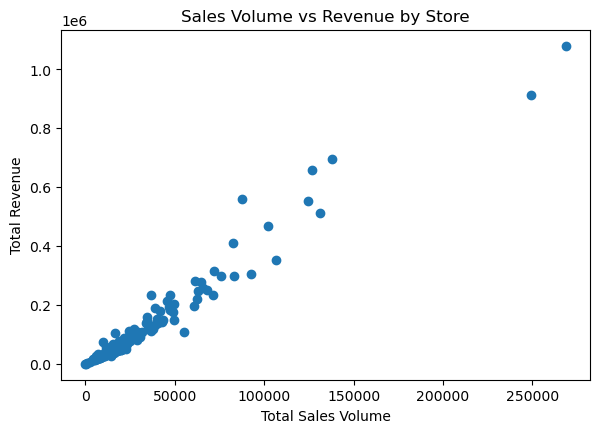

In [66]:
# Scatter plot of sales volume vs revenue
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
plt.scatter(store_analysis['total_sales_volume'], store_analysis['total_revenue'])
plt.title('Sales Volume vs Revenue by Store')
plt.xlabel('Total Sales Volume')
plt.ylabel('Total Revenue')

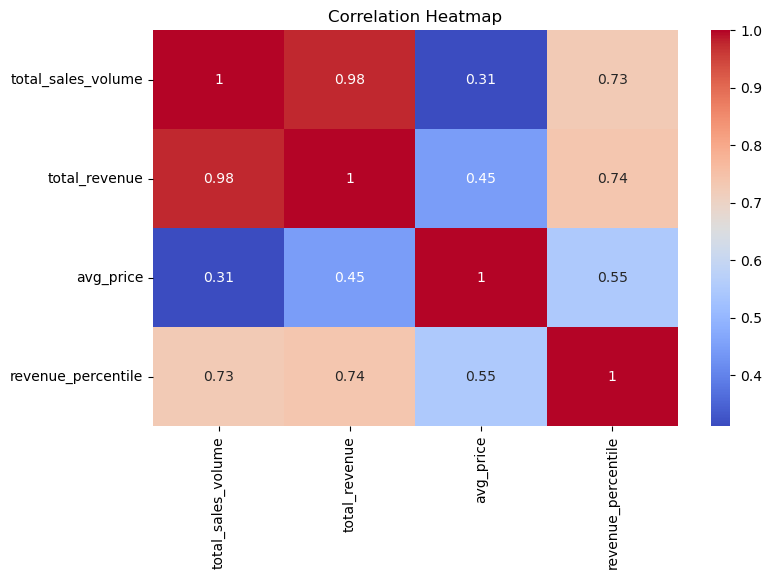

In [68]:
# Heatmap of correlations
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 4)
sns.heatmap(store_analysis.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

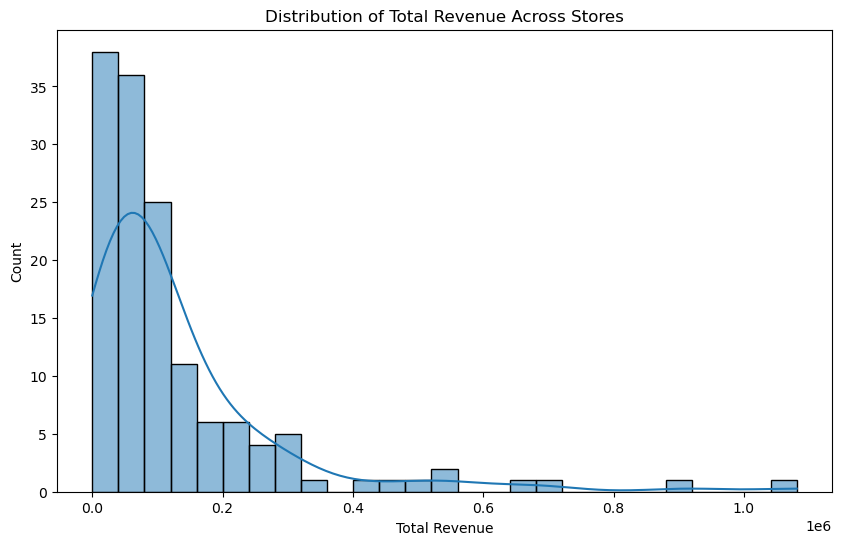

In [70]:
# Additional analysis: Revenue distribution
plt.figure(figsize=(15, 10))

plt.figure(figsize=(10, 6))
sns.histplot(store_analysis['total_revenue'], kde=True)
plt.title('Distribution of Total Revenue Across Stores')
plt.xlabel('Total Revenue')
plt.show()

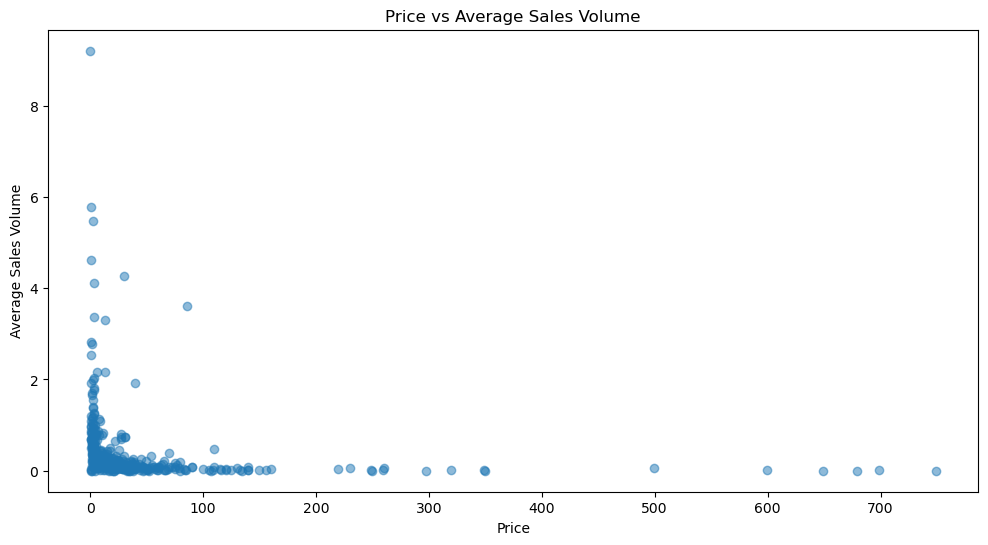

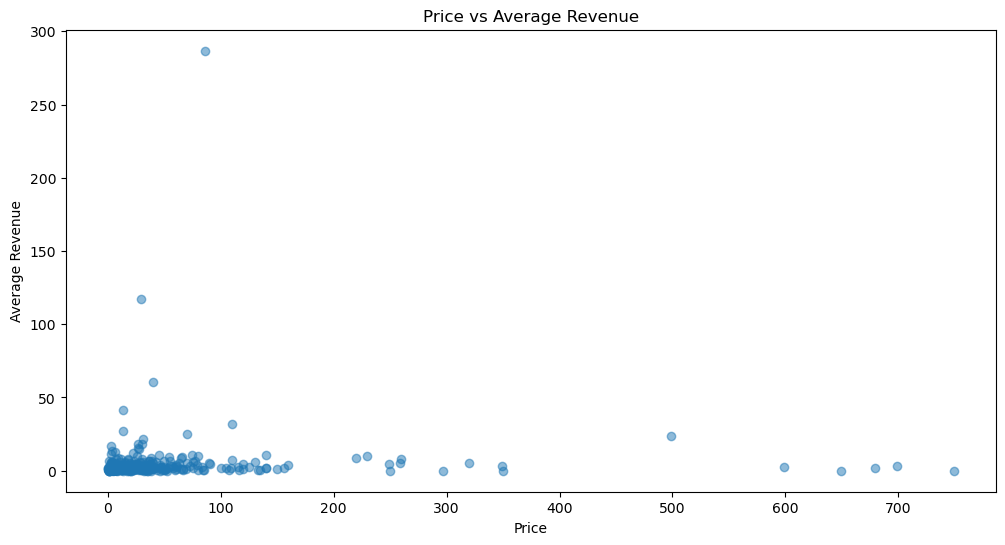

Optimal price point for maximizing revenue: $85.90
Maximum average revenue: $286.74


In [72]:

from scipy import stats

# Assuming 'df' is your original dataframe with columns: 'product_id', 'price', 'sales', 'revenue'

# 1. Group by price and calculate average sales and revenue
price_analysis = sales_df_clean.groupby('price').agg({
    'sales': 'mean',
    'revenue': 'mean'
}).reset_index()



# 3. Visualize the relationship between price and sales volume
plt.figure(figsize=(12, 6))
plt.scatter(price_analysis['price'], price_analysis['sales'], alpha=0.5)
plt.title('Price vs Average Sales Volume')
plt.xlabel('Price')
plt.ylabel('Average Sales Volume')
plt.show()

# 4. Visualize the relationship between price and revenue
plt.figure(figsize=(12, 6))
plt.scatter(price_analysis['price'], price_analysis['revenue'], alpha=0.5)
plt.title('Price vs Average Revenue')
plt.xlabel('Price')
plt.ylabel('Average Revenue')
plt.show()

# 5. Find the price point that maximizes revenue
optimal_price = price_analysis.loc[price_analysis['revenue'].idxmax(), 'price']
max_revenue = price_analysis['revenue'].max()

print(f"Optimal price point for maximizing revenue: ${optimal_price:.2f}")
print(f"Maximum average revenue: ${max_revenue:.2f}")



